Grant William Polonis 
Reg: 202072547

MSc Artificial Intelligence & Applications 
AI for Autonomous Systems 

CS814
Coursework 1

Submission date: 02/11/2020


Question 3

1.	Implement the algorithm A* for the problem mentioned in Part I, using Python Language. (40 points)

2.	Check the result (solution path and its cost) and compare it to the results in Part I. (10 points)





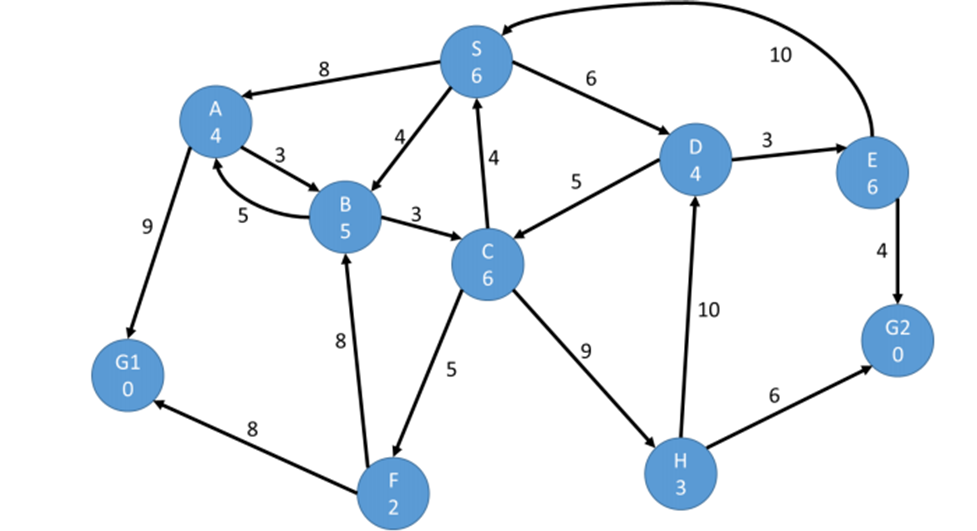










Expected solution from Pseudocode:
Path solution = S D E G2 						Cost: 13

In [1]:
#Firstly define the function for the A* algorithm in this problem
def Astar():
    start = "S" #Assign the starting node of S to a relevantly named variable
    goalstates = "G2" or "G1" #Assign the goal states of G1 and G2 to a relevantly named variable, OR operator allowing choice
    
    #Next, we create a library of items consisting of corresponding lists which represent the possible moves that can be made
    #from one node to the next. The 3 items in each list are the node name in position 0, the heuristic value in position 1, 
    #and the travel cost to reach that node in position 2. Remember, position[0] takes the FIRST item in the list. 
    #Added note: Nodes G1 and G2's lists are empty as once you reach them you do not continue the search as they are goals
    
    possible_moves = {
        "S": [["A", 4, 8], ["B", 5, 4],  ["D", 4, 6]],
        "A": [["B", 5, 3], ["G1", 0, 9]],
        "B": [["A", 4, 5], ["C", 6, 3]],
        "D": [["C", 6, 5], ["E", 6, 3]],
        "C": [["S", 6, 4], ["F", 2, 5], ["H", 3, 9]],
        "E": [["G2", 0, 4], ["S", 6, 10]],
        "F": [["B", 5, 8], ["G1", 0, 8]],
        "H": [["D", 4, 10], ["G2", 0, 6]],
        "G1": [],
        "G2": [],
    }

    visited_list_of_nodes = {} #Create a library to hold the list of visited nodes which will inform the search not to re-visit
    tracking_dictionary = {} #Will produce path solution at the end
    agenda = [["S",6,0]] #Must initiate the agenda variable with the values of S corresponding to the 
                        #format we use for possible_moves



    
    while(agenda !=[[]]): #!= means not equal to. In this case, so long as the agenda is not empty THEN
        present_position = agenda[0] #Create a variable which will update as a current node value. Only use name S or B, not numbers
        if not (len(agenda)==1): 
            for n in agenda: #Use a counter to work through agenda items
                if ( (n[1]+n[2]) < (present_position[1]+present_position[2]) ): #If the heuristic value + travel cost is cheaper for another node in agenda compared to current position
                    present_position = n #THEN replace present position with the cheaper node in the agenda as per A* rules
        agenda.remove(present_position) #Cannot revisit
    
            

        if (present_position[0] in goalstates): #If the name of the node is equal to the defined names assigned to the goalstate variable THEN
           print("Found goal node! ", present_position[0], "\nBelow the path and pathcost will be printed... " ) #Print result
           break #Terminate current loop
        else: 
            #Not found goalstate. Add current node into the list of expanded nodes and go to next cheapest in agenda
            expanded_nodes = possible_moves.get(present_position[0]) 
            for n in expanded_nodes:
                n[2]+= present_position[2]
                tracking_dictionary[n[0]]=[n[2],present_position[0]] #add the node to the tracker
                agenda.append(n) #Add the node to the agenda
    
    
    
    

            
    #OUTPUT
    present_position = present_position[0] #Re-assign the variable present_position with just the name of the node that found the solution
    print ("Goal-solution produced with a path-cost of: {}".format(tracking_dictionary[present_position][0])) #Print pathcost
    print("Path from goal back to starting position S is:\n{}".format(present_position)) #Print the actual path produced
    while (present_position != start): #print the names of the nodes in the tracking dictionary until back to S (start)
        present_position = tracking_dictionary[present_position][1]
        print(present_position)

In [2]:
Astar() #Call the function we defined above to run it and produce a printed solution

Found goal node!  G2 
Below the path and pathcost will be printed... 
Goal-solution produced with a path-cost of: 13
Path from goal back to starting position S is:
G2
E
D
S
